<a href="https://colab.research.google.com/github/HitenPatil27/Task-4-Classification-with-Logistic-Regression/blob/main/Task_4_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing libraries & Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

df = pd.read_csv('//content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Step 2: Data Preprocessing

In [2]:
# Check for nulls
print(df.isnull().sum())

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Step 3: Fit Logistic Regression

In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Step 4: Evaluation

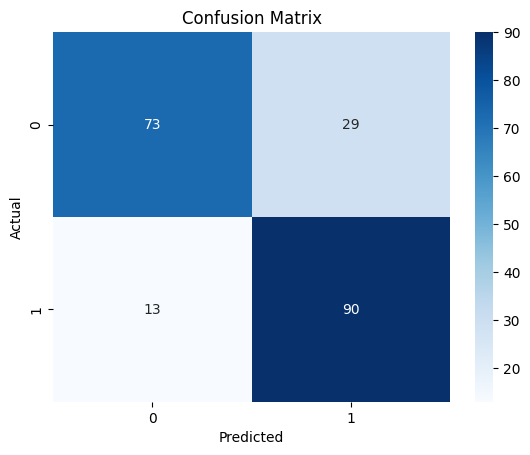


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

ROC-AUC Score: 0.8787


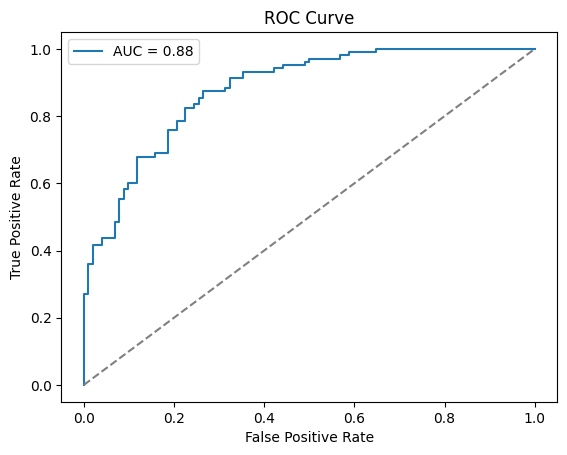

In [4]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_score:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Step 5: Threshold Tuning Example

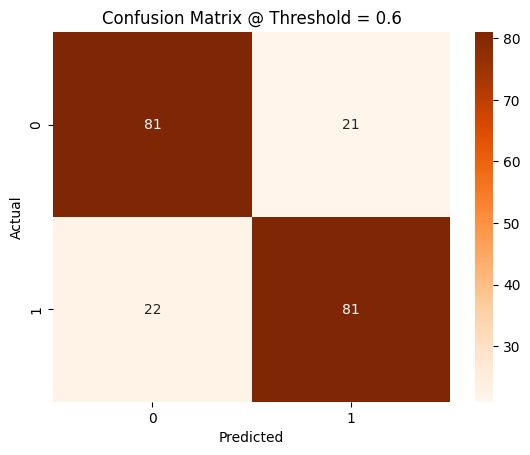

In [5]:
threshold = 0.6  # Try different values
y_pred_thresh = (y_proba >= threshold).astype(int)

# New confusion matrix
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm_thresh, annot=True, fmt='d', cmap='Oranges')
plt.title(f"Confusion Matrix @ Threshold = {threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Explain the Sigmoid Function

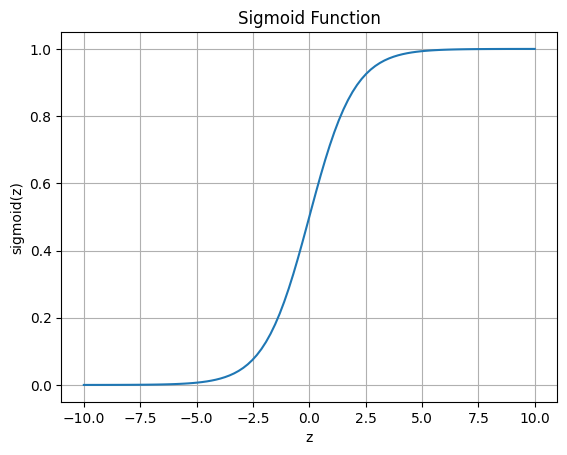

In [6]:
import numpy as np
x_vals = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x_vals))

plt.plot(x_vals, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()